In [1]:
import pandas as pd
import numpy as np

In [5]:
eda_url = "https://exeter-qstep-resources.github.io/pokemon_dataset.csv"
df = pd.read_csv( eda_url, index_col=0, encoding="ISO-8859-1") # take the first column as the index

In [6]:
df.shape

(151, 12)

In [7]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       151 non-null    object
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


In [11]:
# Find columns with null values
df.isnull().sum()

Name          0
Type 1        0
Type 2       84
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Stage         0
Legendary     0
dtype: int64

In [13]:
# Find duplicate values across all columns
df.duplicated()

#
1      False
2      False
3      False
4      False
5      False
       ...  
147    False
148    False
149    False
150    False
151    False
Length: 151, dtype: bool

In [14]:
df[# Find duplicate values across all columns
df.duplicated()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,


In [16]:
df[df.duplicated()].shape


(0, 12)

In [17]:
df[df['Name'].duplicateed()]

AttributeError: 'Series' object has no attribute 'duplicateed'

In [19]:
#  Get some statistics on the df
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


In [21]:
#  Get infor on categorical columns
df.describe(include=['O', 'bool'])

,Name,Type 1,Type 2,Legendary
count,151,151,67,151
unique,151,15,11,2
top,Bulbasaur,Water,Poison,False
freq,1,28,19,147


In [23]:
# all columns
for col in df.columns:
    print('Checking: ', col, type(col))

Checking:  Name <class 'str'>
Checking:  Type 1 <class 'str'>
Checking:  Type 2 <class 'str'>
Checking:  Total <class 'str'>
Checking:  HP <class 'str'>
Checking:  Attack <class 'str'>
Checking:  Defense <class 'str'>
Checking:  Sp. Atk <class 'str'>
Checking:  Sp. Def <class 'str'>
Checking:  Speed <class 'str'>
Checking:  Stage <class 'str'>
Checking:  Legendary <class 'str'>


In [25]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            142, 143, 144, 145, 146, 147, 148, 149, 150, 151],
           dtype='int64', name='#', length=151)

In [27]:
df['Defense'].unique()

array([ 49,  63,  83,  43,  58,  78,  65,  80, 100,  35,  55,  50,  30,
        40,  75,  60,  44,  69,  85, 110,  52,  67,  87,  57,  77,  48,
        73,  20,  45,  70,  25,  95,  15, 115, 130, 180, 160,  90,  53,
        79, 120,   5, 125, 105], dtype=int64)

In [28]:
df['Name'].unique()

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon',
       'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey',
       'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow',
       'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran\x89ªÛ', 'Nidorina', 'Nidoqueen', 'Nidoran\x89ªâ',
       'Nidorino', 'Nidoking', 'Clefairy', 'Clefable', 'Vulpix',
       'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat',
       'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat',
       'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Poliwrath', 'Abra', 'Kadabra', 'Alakazam',
       'Machop', 'Machoke', 'Machamp', 'Bellsprout', 'Weepinbell',
       'Victreebel', 'Tentacool', 'Tentacruel', 'Geodude', 'Graveler',
       'Golem', 'P

In [29]:
df['Defense'].value_counts()

65     11
70     10
55     10
50      9
80      9
60      9
35      8
95      8
100     7
45      7
40      6
85      5
30      4
75      4
90      4
110     3
115     3
48      3
57      3
78      2
120     2
79      2
160     1
180     1
53      1
130     1
125     1
15      1
5       1
49      1
87      1
25      1
20      1
73      1
77      1
63      1
67      1
52      1
69      1
44      1
58      1
43      1
83      1
105     1
Name: Defense, dtype: int64

In [32]:
# Search rows with defense == 100
df[df['Defense']==100]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False
90,Shellder,Water,NaN,305,30,65,100,45,25,40,1,False
127,Pinsir,Bug,NaN,500,65,125,100,55,70,85,1,False
138,Omanyte,Rock,Water,355,35,40,100,90,55,35,1,False
144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False


In [33]:
df['Legendary'].value_counts()

False    147
True       4
Name: Legendary, dtype: int64

In [34]:
df['Type 1'].value_counts(0, dropna=False)

Water       28
Normal      22
Poison      14
Grass       12
Fire        12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Ghost        3
Dragon       3
Fairy        2
Ice          2
Name: Type 1, dtype: int64

In [35]:
df['Type 2'].value_counts(0, dropna=False)

NaN         84
Poison      19
Flying      19
Ground       6
Psychic      6
Water        4
Fairy        3
Ice          3
Grass        2
Steel        2
Rock         2
Fighting     1
Name: Type 2, dtype: int64

In [36]:
df['Type 2'].value_counts(1, dropna=False)

NaN         0.556291
Poison      0.125828
Flying      0.125828
Ground      0.039735
Psychic     0.039735
Water       0.026490
Fairy       0.019868
Ice         0.019868
Grass       0.013245
Steel       0.013245
Rock        0.013245
Fighting    0.006623
Name: Type 2, dtype: float64

(array([ 5., 12., 35., 11., 20., 24., 34.,  7.,  2.,  1.]),
 array([195. , 243.5, 292. , 340.5, 389. , 437.5, 486. , 534.5, 583. ,
        631.5, 680. ]),
 <BarContainer object of 10 artists>)

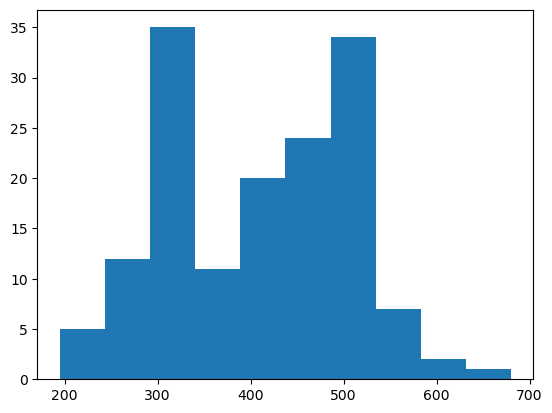

In [38]:
# Histogram examples
import matplotlib.pyplot as plt
plt.hist(df['Total'])

(array([ 5.,  0.,  5.,  7., 17., 18.,  6.,  5., 16.,  4., 15.,  9., 23.,
        11.,  4.,  3.,  2.,  0.,  0.,  1.]),
 array([195.  , 219.25, 243.5 , 267.75, 292.  , 316.25, 340.5 , 364.75,
        389.  , 413.25, 437.5 , 461.75, 486.  , 510.25, 534.5 , 558.75,
        583.  , 607.25, 631.5 , 655.75, 680.  ]),
 <BarContainer object of 20 artists>)

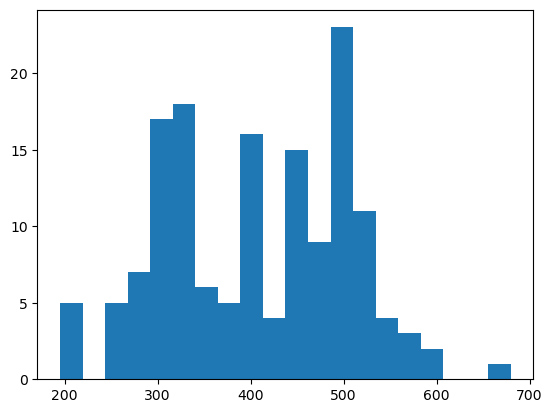

In [40]:
plt.hist(df['Total'], bins=20)

In [41]:
# Explore other plot types
# violin
# heatmap - corr
# boxplot
df.corr()

C:\Users\j\AppData\Local\Temp\ipykernel_15996\2964394379.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Total,1.000000,0.576591,0.670939,0.508694,0.680745,0.774383,0.506950,0.504224,0.328412
HP,0.576591,1.000000,0.306768,0.119782,0.236649,0.490978,-0.040939,0.249207,0.172441
Attack,0.670939,0.306768,1.000000,0.491965,0.146312,0.369069,0.194701,0.361321,0.147486
Defense,0.508694,0.119782,0.491965,1.000000,0.187569,0.139912,-0.053252,0.270861,0.141576
Sp. Atk,0.680745,0.236649,0.146312,0.187569,1.000000,0.522907,0.411516,0.391712,0.334159
Sp. Def,0.774383,0.490978,0.369069,0.139912,0.522907,1.000000,0.392656,0.358308,0.215314
Speed,0.506950,-0.040939,0.194701,-0.053252,0.411516,0.392656,1.000000,0.240042,0.199969
Stage,0.504224,0.249207,0.361321,0.270861,0.391712,0.358308,0.240042,1.000000,-0.142508
Legendary,0.328412,0.172441,0.147486,0.141576,0.334159,0.215314,0.199969,-0.142508,1.000000


In [42]:
df['Type 2'].value_counts()

Poison      19
Flying      19
Ground       6
Psychic      6
Water        4
Fairy        3
Ice          3
Grass        2
Steel        2
Rock         2
Fighting     1
Name: Type 2, dtype: int64

In [43]:
df['Type 2'].value_counts(dropna=False)

NaN         84
Poison      19
Flying      19
Ground       6
Psychic      6
Water        4
Fairy        3
Ice          3
Grass        2
Steel        2
Rock         2
Fighting     1
Name: Type 2, dtype: int64

In [ ]:
df['Type 2'].fillna(value='NA'.inplace=True)